# batch normalization이 미치는 영향

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
import copy

#np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [2]:
torch.manual_seed(1)

mnist_train = datasets.MNIST(root='MNIST_data/', train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST(root='MNIST_data/', train=False, download=True, transform=transforms.ToTensor())

train_loader = DataLoader(dataset=mnist_train, batch_size=32, shuffle=False, drop_last=True)
train_test = DataLoader(dataset=mnist_test, batch_size=32, shuffle=False, drop_last=True)

C:\Users\DMQA\anaconda3\envs\main\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
linear1 = nn.Linear(784,32,bias=True)
linear2 = nn.Linear(32,32,bias=True)
linear3 = nn.Linear(32,32,bias=True)

bn_linear1 = copy.deepcopy(linear1)
bn_linear2 = copy.deepcopy(linear2)
bn_linear3 = copy.deepcopy(linear3)

class basic_model(nn.Module):
    def __init__(self):
        super(basic_model, self).__init__()
        self.fc1 = linear1
        self.fc2 = linear2
        self.fc3 = linear3
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        #print(out)
        out = self.relu(out)
        #print(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

class batchnorm_model(nn.Module):
    def __init__(self):
        super(batchnorm_model,self).__init__()
        self.fc1 = bn_linear1
        self.fc2 = bn_linear2 
        self.fc3 = bn_linear3
        self.relu = nn.ReLU()
        self.batch1 = nn.BatchNorm1d(32)
        self.batch2 = nn.BatchNorm1d(32)
    
    def forward(self, x):
        out = self.fc1(x)
        #print(out)
        out = self.batch1(out)
        #print(out)
        out = self.relu(out)
        #print(out)
        out = self.fc2(out)
        out = self.batch2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [4]:
base_model = basic_model()

for epoch in range(1):
    for X,Y in train_loader:
        X = X.view(-1, 28*28)
        Y = Y

        base_predict = base_model(X)
        break

tensor([[-0.0670, -0.0555, -0.1320,  ..., -0.2561,  0.4735,  0.2064],
        [ 0.1682, -0.0104, -0.3163,  ...,  0.0014,  0.3961, -0.0819],
        [-0.0427, -0.0915, -0.0578,  ..., -0.1353,  0.2736, -0.0332],
        ...,
        [-0.1127,  0.1074, -0.0797,  ..., -0.0825,  0.2056,  0.1114],
        [-0.1161,  0.2110,  0.1304,  ..., -0.1562,  0.2155,  0.3483],
        [-0.2512,  0.1737, -0.3614,  ...,  0.1445,  0.3043, -0.0791]],
       grad_fn=<AddmmBackward>)
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.4735, 0.2064],
        [0.1682, 0.0000, 0.0000,  ..., 0.0014, 0.3961, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.2736, 0.0000],
        ...,
        [0.0000, 0.1074, 0.0000,  ..., 0.0000, 0.2056, 0.1114],
        [0.0000, 0.2110, 0.1304,  ..., 0.0000, 0.2155, 0.3483],
        [0.0000, 0.1737, 0.0000,  ..., 0.1445, 0.3043, 0.0000]],
       grad_fn=<ReluBackward0>)


In [5]:
bn_model = batchnorm_model()

for epoch in range(1):
    for X,Y in train_loader:
        X = X.view(-1, 28*28)
        Y = Y

        bn_model_predict = bn_model(X)
        break

tensor([[-0.0670, -0.0555, -0.1320,  ..., -0.2561,  0.4735,  0.2064],
        [ 0.1682, -0.0104, -0.3163,  ...,  0.0014,  0.3961, -0.0819],
        [-0.0427, -0.0915, -0.0578,  ..., -0.1353,  0.2736, -0.0332],
        ...,
        [-0.1127,  0.1074, -0.0797,  ..., -0.0825,  0.2056,  0.1114],
        [-0.1161,  0.2110,  0.1304,  ..., -0.1562,  0.2155,  0.3483],
        [-0.2512,  0.1737, -0.3614,  ...,  0.1445,  0.3043, -0.0791]],
       grad_fn=<AddmmBackward>)
tensor([[ 0.1685, -0.8580, -0.4417,  ..., -1.1178,  0.5969,  0.8132],
        [ 2.5056, -0.5298, -1.9844,  ...,  0.6609,  0.1511, -1.4087],
        [ 0.4094, -1.1212,  0.1799,  ..., -0.2836, -0.5552, -1.0334],
        ...,
        [-0.2856,  0.3293, -0.0037,  ...,  0.0814, -0.9466,  0.0808],
        [-0.3195,  1.0852,  1.7550,  ..., -0.4279, -0.8899,  1.9069],
        [-1.6618,  0.8131, -2.3615,  ...,  1.6497, -0.3779, -1.3873]],
       grad_fn=<NativeBatchNormBackward>)
tensor([[0.1685, 0.0000, 0.0000,  ..., 0.0000, 0.5969, 0.8

In [16]:
base_model = basic_model()
base_criterion = torch.nn.CrossEntropyLoss()
base_optimizer = optim.Adam(base_model.parameters(), lr=0.001)

base_train_loss = []
base_test_loss = []

for epoch in range(1):
    base_model.train()

    for X,Y in train_loader:
        X = X.view(-1, 28*28)
        Y = Y

        base_optimizer.zero_grad()
        base_predict = base_model(X)
        base_loss = base_criterion(base_predict, Y)
        base_loss.backward()
        base_optimizer.step()

        break
        

tensor([[ 0.2043,  0.1692, -0.2637,  ...,  0.0716, -0.0338, -0.1105],
        [ 0.1196, -0.0432, -0.3785,  ..., -0.1595, -0.2196, -0.1844],
        [ 0.2596,  0.1648, -0.2030,  ...,  0.0782,  0.0024,  0.2941],
        ...,
        [ 0.1171,  0.0896, -0.1296,  ..., -0.1014,  0.1282,  0.0279],
        [ 0.2528,  0.3887, -0.0553,  ...,  0.1406, -0.1135, -0.1309],
        [ 0.2885,  0.0699, -0.1020,  ..., -0.2190, -0.1932,  0.0370]],
       grad_fn=<AddmmBackward>)
tensor([[0.2043, 0.1692, 0.0000,  ..., 0.0716, 0.0000, 0.0000],
        [0.1196, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.2596, 0.1648, 0.0000,  ..., 0.0782, 0.0024, 0.2941],
        ...,
        [0.1171, 0.0896, 0.0000,  ..., 0.0000, 0.1282, 0.0279],
        [0.2528, 0.3887, 0.0000,  ..., 0.1406, 0.0000, 0.0000],
        [0.2885, 0.0699, 0.0000,  ..., 0.0000, 0.0000, 0.0370]],
       grad_fn=<ReluBackward0>)


In [17]:

bn_model = batchnorm_model()
bn_criterion = torch.nn.CrossEntropyLoss()
bn_optimizer = optim.Adam(bn_model.parameters(), lr=0.001)

bn_train_loss = []
bn_test_loss = []

for epoch in range(1):
    bn_model.train()

    for X,Y in train_loader:
        X = X.view(-1, 28*28)
        Y = Y

        bn_optimizer.zero_grad()
        bn_predict = bn_model(X)
        bn_loss = bn_criterion(bn_predict, Y)
        bn_loss.backward()
        bn_optimizer.step()

        break

tensor([[ 0.2043,  0.1692, -0.2637,  ...,  0.0716, -0.0338, -0.1105],
        [ 0.1196, -0.0432, -0.3785,  ..., -0.1595, -0.2196, -0.1844],
        [ 0.2596,  0.1648, -0.2030,  ...,  0.0782,  0.0024,  0.2941],
        ...,
        [ 0.1171,  0.0896, -0.1296,  ..., -0.1014,  0.1282,  0.0279],
        [ 0.2528,  0.3887, -0.0553,  ...,  0.1406, -0.1135, -0.1309],
        [ 0.2885,  0.0699, -0.1020,  ..., -0.2190, -0.1932,  0.0370]],
       grad_fn=<AddmmBackward>)
tensor([[ 0.0351,  0.1027, -0.8657,  ...,  1.3190,  0.1238, -0.6274],
        [-0.4573, -1.2641, -1.7105,  ..., -0.6838, -1.3204, -1.2008],
        [ 0.3563,  0.0739, -0.4195,  ...,  1.3762,  0.4047,  2.5129],
        ...,
        [-0.4716, -0.4099,  0.1206,  ..., -0.1801,  1.3831,  0.4468],
        [ 0.3169,  1.5144,  0.6671,  ...,  1.9168, -0.4957, -0.7852],
        [ 0.5246, -0.5361,  0.3234,  ..., -1.1995, -1.1154,  0.5180]],
       grad_fn=<NativeBatchNormBackward>)
tensor([[0.0351, 0.1027, 0.0000,  ..., 1.3190, 0.1238, 0.0

In [7]:
for names in base_model.state_dict():
    print(names)
    print(base_model.state_dict()[names])

for name in bn_model.state_dict():
    print(name)
    print(bn_model.state_dict()[name])

fc1.weight
tensor([[ 0.0184, -0.0158, -0.0069,  ...,  0.0068, -0.0041,  0.0025],
        [-0.0274, -0.0224, -0.0309,  ..., -0.0029,  0.0013, -0.0167],
        [ 0.0282, -0.0095, -0.0340,  ..., -0.0141,  0.0056, -0.0335],
        ...,
        [ 0.0226,  0.0331,  0.0182,  ...,  0.0150,  0.0278, -0.0073],
        [-0.0210,  0.0144,  0.0214,  ..., -0.0308, -0.0335,  0.0085],
        [ 0.0219,  0.0195, -0.0009,  ...,  0.0191,  0.0218, -0.0320]])
fc1.bias
tensor([-0.0307, -0.0331, -0.0263, -0.0178, -0.0344,  0.0138,  0.0016, -0.0208,
         0.0306, -0.0286,  0.0310,  0.0326,  0.0169,  0.0296,  0.0092, -0.0179,
         0.0081,  0.0100, -0.0235, -0.0033,  0.0248,  0.0040, -0.0298,  0.0020,
        -0.0164, -0.0129, -0.0136, -0.0267, -0.0161,  0.0283,  0.0218,  0.0234])
fc2.weight
tensor([[-0.1084, -0.1104,  0.1025,  ...,  0.0448,  0.0729,  0.1699],
        [-0.0593, -0.1072,  0.1283,  ..., -0.0471,  0.0327, -0.1190],
        [-0.1477, -0.1216,  0.0104,  ...,  0.0205,  0.0137, -0.1070],
    

# Train loss vs Test loss 비교하기

In [11]:
len(train_loader)

1875

In [7]:
base_model = basic_model()
base_criterion = torch.nn.CrossEntropyLoss()
base_optimizer = optim.Adam(base_model.parameters(), lr=0.001)

base_train_loss = []
base_test_loss = []

for epoch in range(15):
    base_model.train()
    avg_cost = 0

    for X,Y in train_loader:
        X = X.view(-1, 28*28)
        Y = Y

        base_optimizer.zero_grad()
        base_predict = base_model(X)
        base_loss = base_criterion(base_predict, Y)
        base_loss.backward()
        base_optimizer.step()

    avg_cost += base_loss / len(train_loader)
    base_train_loss.append(avg_cost.item())

    print('epoch: ', epoch, 'cost: ', avg_cost.item() )


        

epoch:  0 cost:  5.057408634456806e-05
epoch:  1 cost:  1.9800858353846706e-05
epoch:  2 cost:  1.3690491869056132e-05
epoch:  3 cost:  1.1773519872804172e-05
epoch:  4 cost:  1.6117228369694203e-05
epoch:  5 cost:  1.7431439118809067e-05
epoch:  6 cost:  1.5606561646563932e-05
epoch:  7 cost:  1.7677084542810917e-05
epoch:  8 cost:  1.6763293388066813e-05
epoch:  9 cost:  1.4744530744792428e-05
epoch:  10 cost:  1.22299925351399e-05
epoch:  11 cost:  1.0585506061033811e-05
epoch:  12 cost:  1.123619222198613e-05
epoch:  13 cost:  9.816709280130453e-06
epoch:  14 cost:  7.574075425509363e-06


In [9]:
base_train_loss

[6.162463978398591e-05,
 3.775424920604564e-05,
 1.9667701053549536e-05,
 1.3259685147204436e-05,
 1.0538067726884037e-05,
 8.068742317846045e-06,
 6.615039183088811e-06,
 6.827609922765987e-06,
 6.708504315611208e-06,
 5.4978104344627354e-06,
 6.794320142944343e-06,
 5.0577095862536225e-06,
 6.226142886589514e-06,
 1.1537786122062244e-05,
 6.850424597359961e-06]

<function matplotlib.pyplot.show(close=None, block=None)>

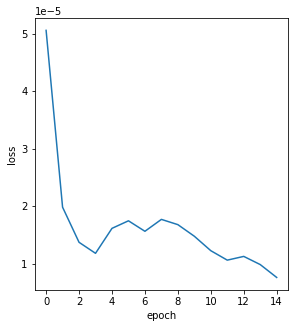

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(range(15),base_train_loss)
plt.show